# 1. Module import


In [711]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Load Data



In [712]:
df = pd.read_csv('laptop_price.csv', encoding='latin1')

In [713]:
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [714]:
df.shape

(1303, 13)

# 3. Handling Missing Data

In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [716]:
df.duplicated().sum()# kiểm tra số lượng hàng trùng lặp

0

In [717]:
df.isnull().sum() # tính tổng số lượng giá trị null trong mỗi cột của DataFrame để có thể xử lý giá trị null

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

# 4. Cleaning Data

In [718]:
#df.drop(columns=['Unnamed: 0'],inplace=True) #inplace=True, thay đổi sẽ được áp dụng trực tiếp vào DataFrame df mà không tạo ra một bản sao mới
df = df.drop("Product", axis=1) #axis=1 chỉ định việc loại bỏ thực hiện theo chiều cột, còn 0 sẽ thực hiện theo chiều dòng

In [719]:
df = df.drop("laptop_ID", axis=1)

In [720]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [721]:
#df['Ram'] = df['Ram'].str.replace('GB','')
df["Ram"] = df["Ram"].str[:-2]
#df['Weight'] = df['Weight'].str.replace('kg','')
df["Weight"]=df["Weight"].str[:-2]

In [722]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [723]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [724]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# 5. Exploratory Data Analysis

In [725]:
import seaborn as sns

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

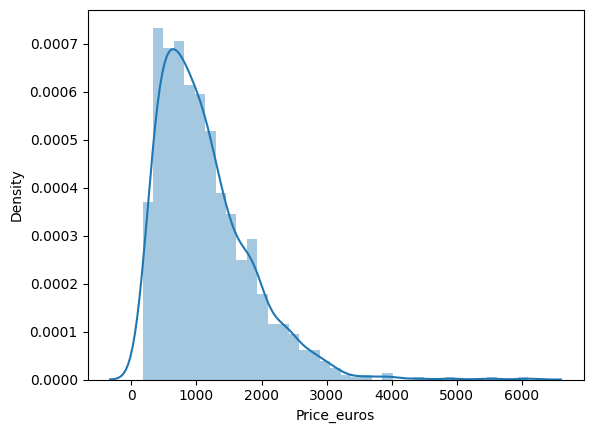

In [726]:
sns.distplot(df['Price_euros']) #tạo một đồ thị phân phối (distribution plot) của cột 'Price' trong DataFrame df

<AxesSubplot:>

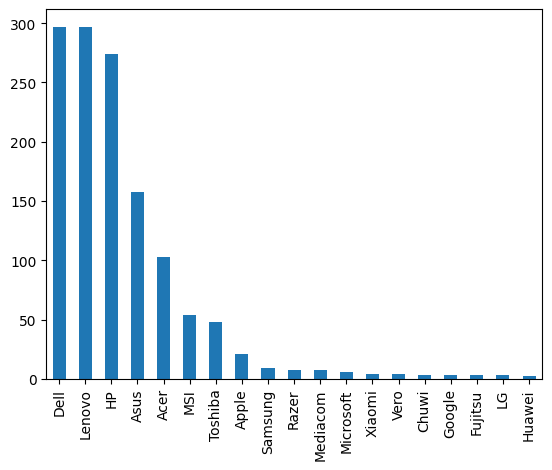

In [727]:
df['Company'].value_counts().plot(kind='bar') 
#value_counts()để đếm số lượng lần xuất hiện của mỗi giá trị trong cột Company
#kind='bar' xác định loại biểu đồ là biểu đồ cột.

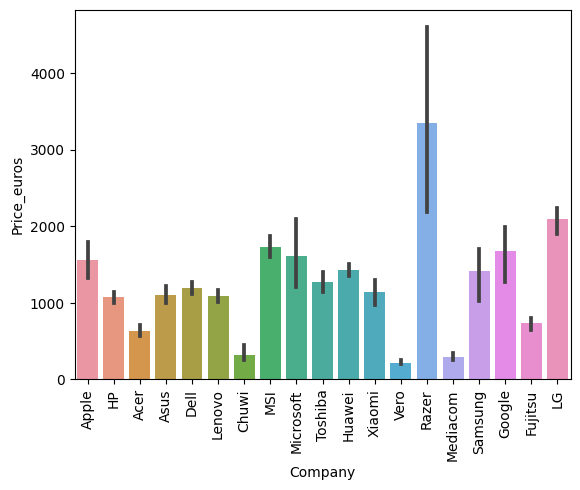

In [728]:
sns.barplot(x=df['Company'],y=df['Price_euros']) #trục x là các giá trị công ty, trục y là giá trị trung bình của cột 'Price_euros'
plt.xticks(rotation='vertical') #nhãn trục x được xoay theo chiều dọc để dễ đọc
plt.show()

<AxesSubplot:>

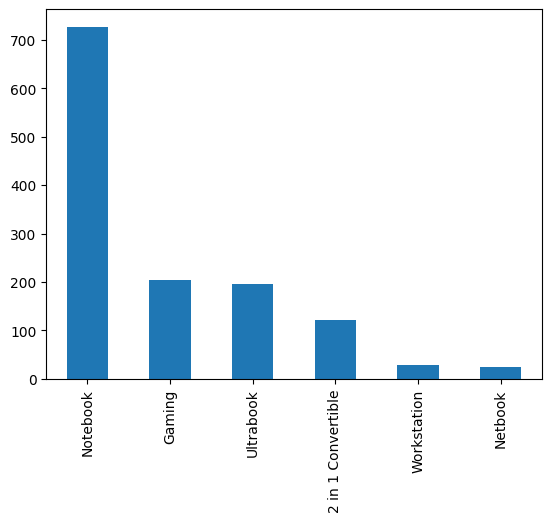

In [729]:
df['TypeName'].value_counts().plot(kind='bar')

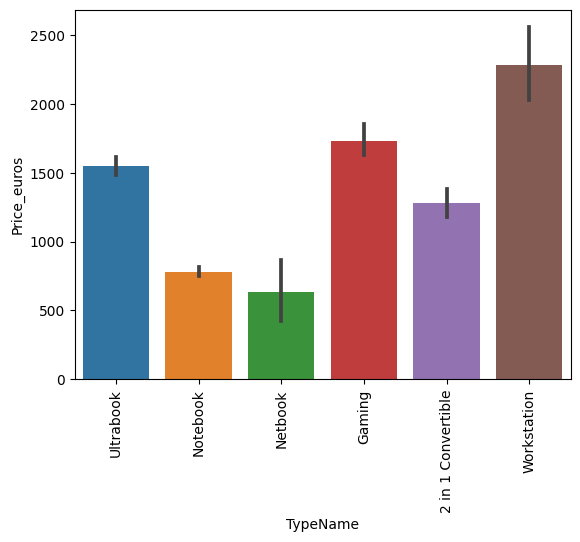

In [730]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Inches', ylabel='Density'>

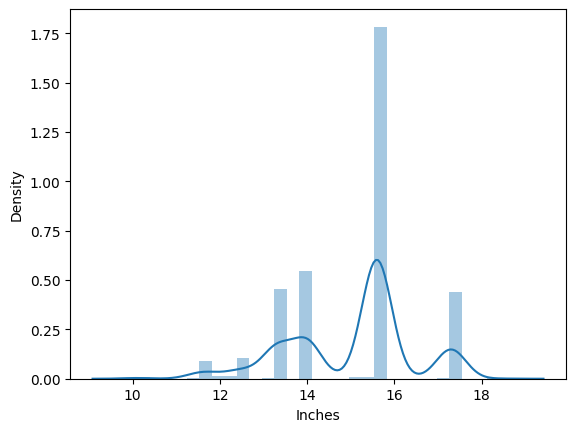

In [731]:
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

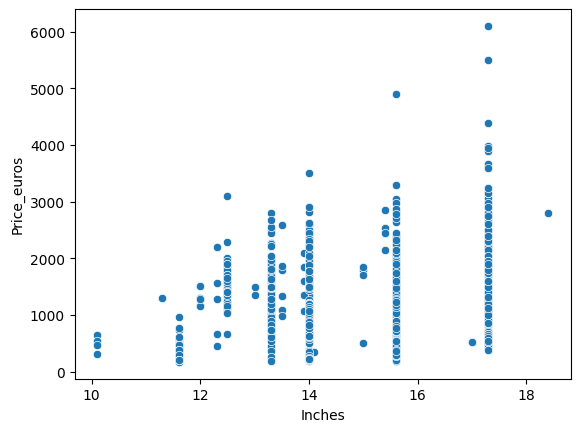

In [732]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])#tạo một biểu đồ phân tán (scatter plot)

# 6. Feature Engineering

In [733]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [734]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
# tạocột mới có tên là 'Touchscreen' trong DataFrame df, thể hiện tính năng 'Touchscreen' của mỗi sản phẩm, với giá trị 1 cho những sản phẩm có màn hình cảm ứng và giá trị 0 cho những sản phẩm không có màn hình cảm ứng

In [735]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
554,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,1280.00,0
510,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.29,899.00,1
213,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,2.20,549.00,0
344,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,1579.00,0
921,HP,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,AMD Radeon R7 M365X,Windows 10,1.84,1296.99,0


<AxesSubplot:>

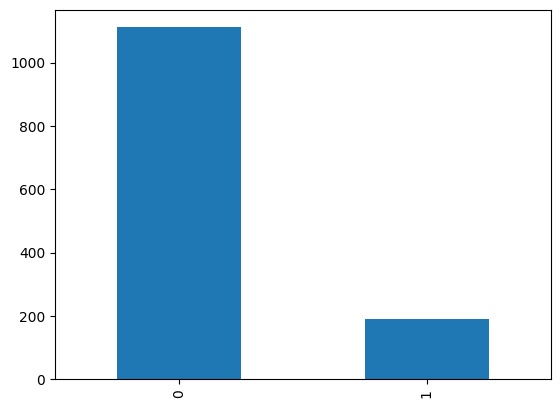

In [736]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

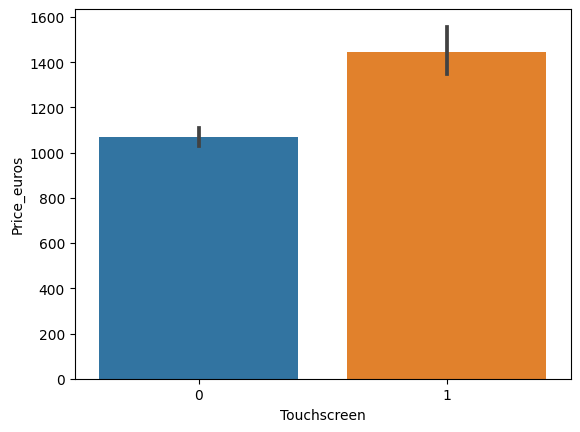

In [737]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [738]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [739]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<AxesSubplot:>

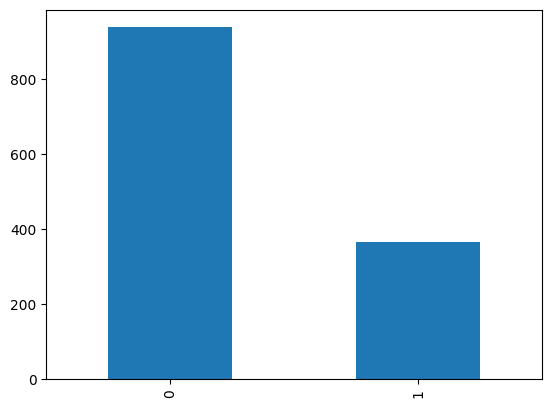

In [740]:
df['Ips'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

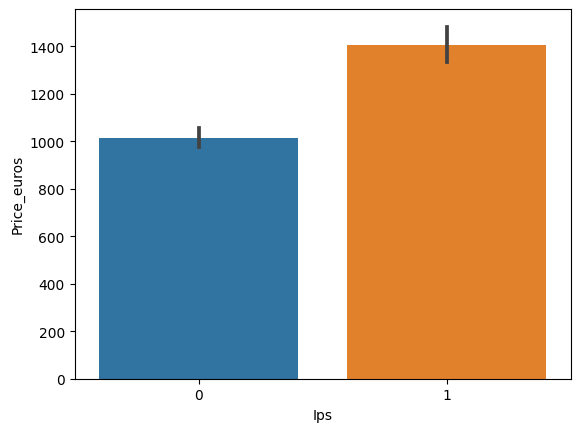

In [741]:
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [742]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
#.str.split() để tách chuỗi thành các phần tử dựa trên một ký tự phân cách
# sử dụng ký tự 'x' làm điểm phân cách.
# Tham số n=1 chỉ định rằng chỉ có một sự phân cách xảy ra, giới hạn số lượng cột mới tạo ra là 2.
# expand=True được sử dụng để tạo các cột mới từ các phần tử tách ra.

In [743]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [744]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,1366,768


In [745]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
555,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Linux,2.00,224.0,0,0,1366,768
549,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.99,1729.0,0,1,IPS Panel Full HD 1920,1080
539,Lenovo,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.87,859.0,0,1,IPS Panel Full HD 1920,1080
756,HP,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1099.0,0,1,IPS Panel Full HD 1920,1080
1224,Dell,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.08,509.0,1,0,Full HD / Touchscreen 1920,1080


In [746]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
#str.replace(',','') để loại bỏ dấu ',' trong các giá trị của cột 'X_res'
#str.findall(r'(\d+\.?\d+)') tìm tất cả các chuỗi gồm các chữ số (bao gồm cả phần thập phân nếu có)
#lambda x:x[0] chỉ lấy giá trị đầu tiên từ danh sách các mẫu số tìm thấy trong mỗi giá trị của 'X_res'

In [747]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [748]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [749]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price_euros       1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [750]:
df.corr()['Price_euros'] # hiển thị hệ số tương quan giữa 'Price_euros' và các cột khác trong DataFrame df

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [751]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
#Tính toán độ phân giải điểm ảnh trên mỗi inch của màn hình, hay còn gọi là "Pixels Per Inch" (PPI).

In [752]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price_euros, dtype: float64

In [753]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [754]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,226.983005


In [755]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [756]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005


In [757]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [758]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
#[0:3] chỉ lấy ba từ đầu tiên
#.join() để kết hợp các từ trong danh sách thành một chuỗi, với mỗi từ được phân tách bằng dấu cách

In [759]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


In [760]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [761]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [762]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

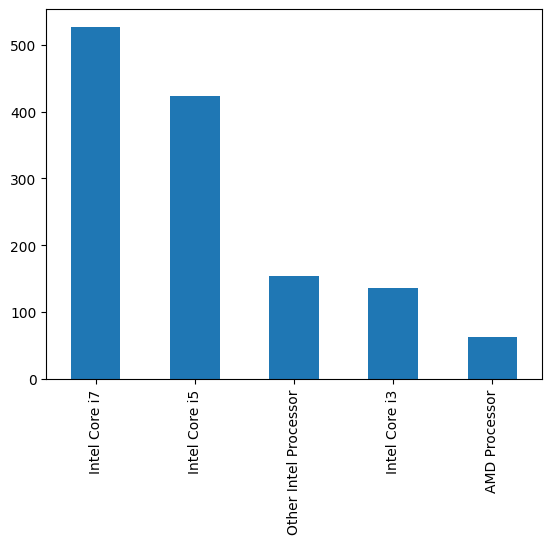

In [763]:
df['Cpu brand'].value_counts().plot(kind='bar')

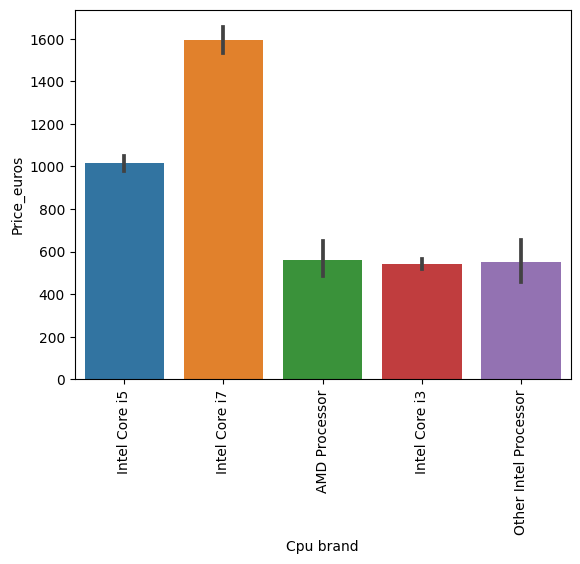

In [764]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [765]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [766]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:>

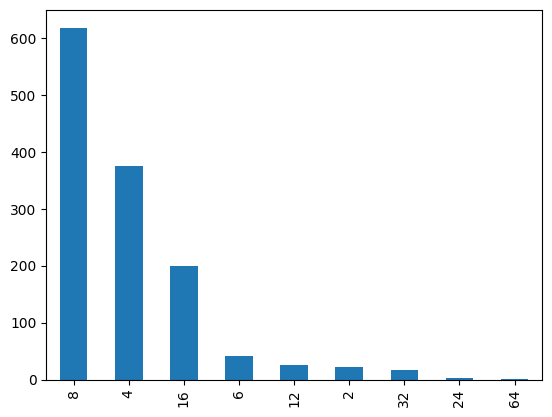

In [767]:
df['Ram'].value_counts().plot(kind='bar')

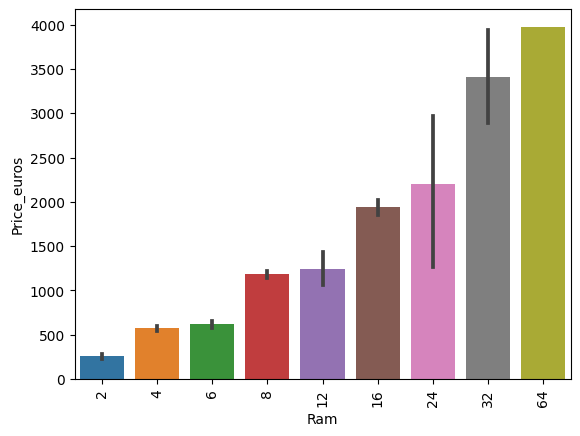

In [768]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [769]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [770]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True) #Chuyển đổi kiểu dữ liệu của cột 'Memory' thành chuỗi và loại bỏ các số thập phân '.0' trong chuỗi.
#regex=True cho phép sử dụng các biểu thức chính quy (regular expressions) để tìm kiếm và thay thế các chuỗi trong các chuỗi dữ liệu
df["Memory"] = df["Memory"].str.replace('GB', '') #Xóa ký tự 'GB' trong chuỗi 'Memory'.
df["Memory"] = df["Memory"].str.replace('TB', '000') #Thay thế ký tự 'TB' bằng '000' trong chuỗi 'Memory'.
new = df["Memory"].str.split("+", n = 1, expand = True) #Tách chuỗi 'Memory' thành hai phần tách nhau bởi dấu '+' và tạo DataFrame mới 'new' với hai cột.



df["first"]= new[0] #Gán cột đầu tiên của 'new' vào cột 'first' trong DataFrame df
df["first"]=df["first"].str.strip() #Loại bỏ khoảng trắng thừa trong cột 'first'

df["second"]= new[1] #Gán cột còn lại của 'new' vào cột 'second' trong DataFrame df

#

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0) #Gán giá trị 1 nếu chuỗi 'HDD' xuất hiện trong cột 'first', ngược lại gán giá trị 0.
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0) #Gán giá trị 1 nếu chuỗi 'SSD' xuất hiện trong cột 'first', ngược lại gán giá trị 0.
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0) #Gán giá trị 1 nếu chuỗi 'Hybrid' xuất hiện trong cột 'first', ngược lại gán giá trị 0.
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0) #Gán giá trị 1 nếu chuỗi 'Flash Storage' xuất hiện trong cột 'first', ngược lại gán giá trị 0.

df['first'] = df['first'].str.replace(r'\D', '') # Loại bỏ tất cả các ký tự không phải số trong cột 'first'.

df["second"].fillna("0", inplace = True) #Thay thế các giá trị null trong cột 'second' bằng '0'.

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0) #Gán giá trị 1 nếu chuỗi 'HDD' xuất hiện trong cột 'second', ngược lại gán giá trị 0.
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0) #Gán giá trị 1 nếu chuỗi 'SSD' xuất hiện trong cột 'second', ngược lại gán giá trị 0.
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0) #Gán giá trị 1 nếu chuỗi 'Hybrid' xuất hiện trong cột 'second', ngược lại gán giá trị 0.
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0) #Gán giá trị 1 nếu chuỗi 'Flash Storage' xuất hiện trong cột 'second', ngược lại gán giá trị 0.

df['second'] = df['second'].str.replace(r'\D', '') #Loại bỏ tất cả các ký tự không phải số trong cột 'second'.
#Chuyển đổi kiểu dữ liệu
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
# tính toán các cột mới dựa trên các giá trị trong 'first' và 'second'
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: The default value of regex will change from True to False in a future version.


In [771]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
543,Acer,Gaming,8,1000 HDD,Nvidia GeForce GTX 1050,Linux,2.40,798.00,0,0,...,0,0,0,0,0,0,1000,0,0,0
728,Dell,Notebook,8,1000 HDD,AMD Radeon R7 M445,Linux,2.32,589.52,0,0,...,0,0,0,0,0,0,1000,0,0,0
930,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 505,Windows 10,2.20,309.00,0,0,...,0,0,0,0,0,0,1000,0,0,0
1189,Acer,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1070,Windows 10,4.20,2599.00,0,1,...,0,0,1,0,0,0,1000,256,0,0
927,HP,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,2.31,1165.00,0,0,...,0,0,0,0,0,0,0,256,0,0


In [772]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [773]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,0,0


In [774]:
df.drop(columns=['Memory'],inplace=True)

In [775]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [776]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [777]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)  #xóa vì ảnh hưởng về giá cả của hai cột này là không nhiều

In [778]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256


In [779]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [780]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
#lambda x: x.split()[0] được sử dụng để tách chuỗi 'Gpu' thành các từ riêng biệt và trả về từ đầu tiên

In [781]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [782]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [783]:
df = df[df['Gpu brand'] != 'ARM'] #loại bỏ các hàng có giá trị 'ARM' trong cột 'Gpu brand' khỏi DataFrame gốc

In [784]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

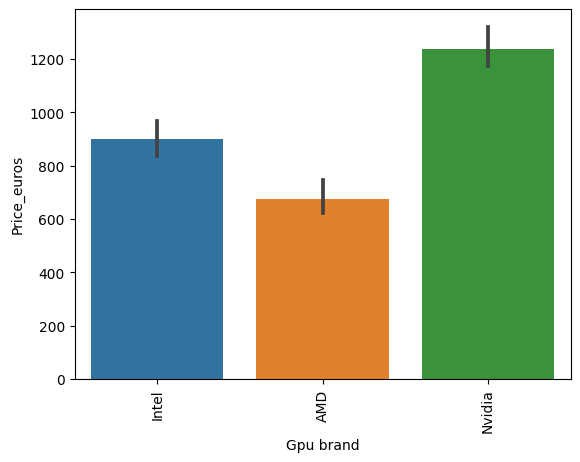

In [785]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median) #estimator=np.median tính giá trị trung vị (median) của các mẫu có cùng giá trị trên trục x.
plt.xticks(rotation='vertical')
plt.show()

In [786]:
df.drop(columns=['Gpu'],inplace=True)

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [787]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [788]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

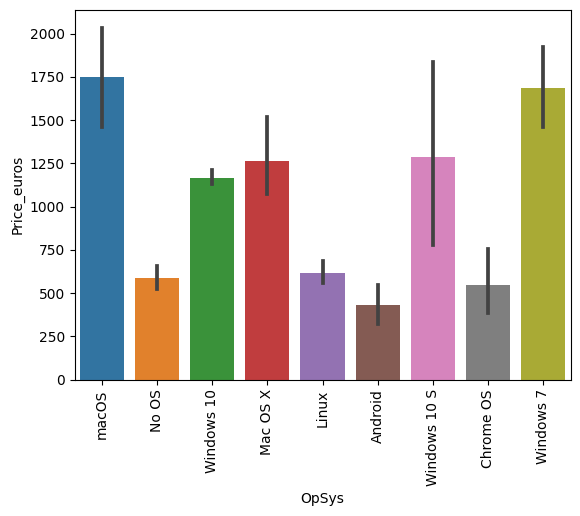

In [789]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [790]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [791]:
df['os'] = df['OpSys'].apply(cat_os)

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [792]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [793]:
df.drop(columns=['OpSys'],inplace=True)

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


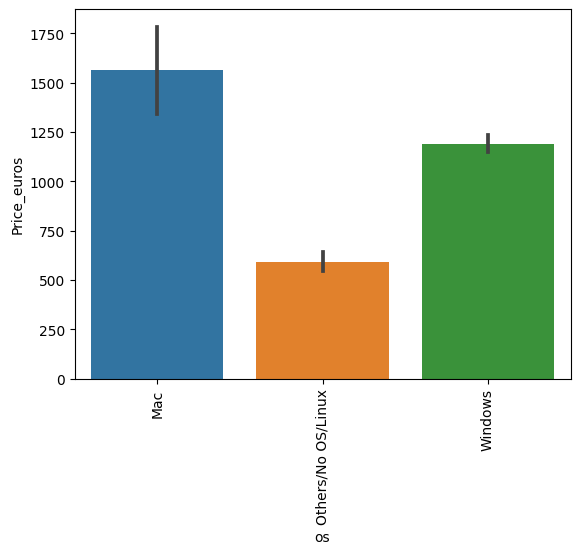

In [794]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Weight', ylabel='Density'>

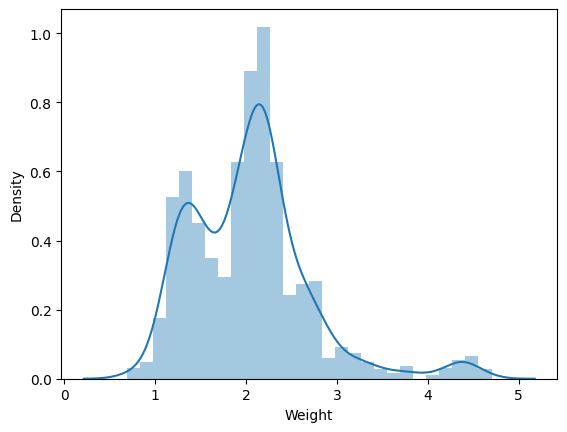

In [795]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

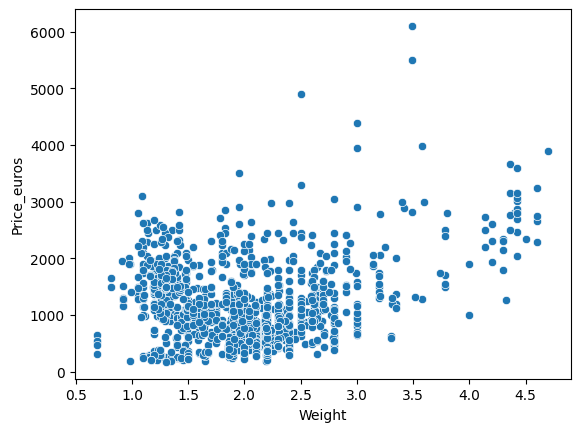

In [796]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [797]:
df.corr()['Price_euros']

Ram            0.742905
Weight         0.209867
Price_euros    1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price_euros, dtype: float64

<AxesSubplot:>

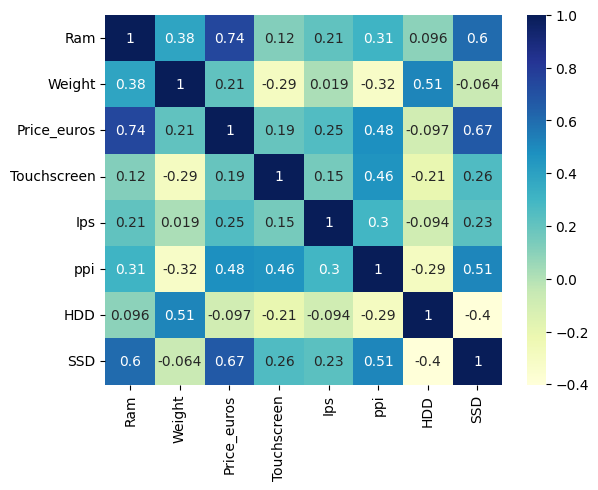

In [798]:
sns.heatmap(df.corr(), annot=True, cmap = "YlGnBu")
#annot=True hiển thị giá trị của mỗi ô trong biểu đồ. Giá trị của mỗi ô thể hiện mức độ tương quan giữa hai biến
#cmap = "YlGnBu"  xanh sáng sẽ được sử dụng cho các giá trị tương quan cao, trong khi màu xanh lá cây và xanh dương sẽ được sử dụng cho các giá trị tương quan thấp hơn

Giá trị dương: Chỉ ra sự tương quan thuận, tức là khi một biến tăng, biến còn lại cũng tăng. Một giá trị dương lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Giá trị âm: Chỉ ra sự tương quan nghịch, tức là khi một biến tăng, biến còn lại giảm. Một giá trị âm lớn hơn sẽ chỉ ra một mức độ tương quan mạnh hơn giữa hai biến.

Biểu đồ heatmap sử dụng các màu sắc để đại diện cho các giá trị tương quan, trong đó các giá trị dương thường được hiển thị bằng màu sáng hơn (ví dụ: màu xanh lá cây hoặc màu vàng) và các giá trị âm thường được hiển thị bằng màu tối hơn (ví dụ: màu xanh đậm hoặc màu tím)

c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

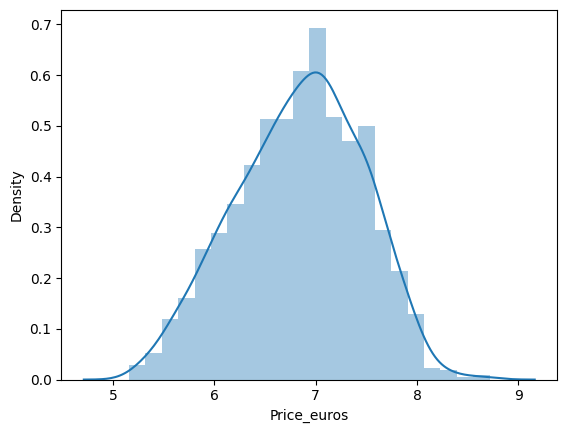

In [799]:
sns.distplot(np.log(df['Price_euros']))

In [800]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

#sử dụng hàm 'np.log' từ thư viện NumPy để tính logarit tự nhiên của các giá trị trong cột 'Price_euros'. Điều này thường được thực hiện khi giá trị đầu ra có phân phối không đồng đều và áp dụng logarit có thể giúp đưa dữ liệu
# về phân phối gần hơn với phân phối chuẩn và giúp mô hình học tốt hơn.

In [801]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [802]:
y

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: Price_euros, Length: 1302, dtype: float64

In [803]:
y.sort_values(ascending=False)

196     8.715880
830     8.612322
610     8.496786
749     8.386857
1066    8.287780
          ...   
290     5.293305
31      5.293305
1120    5.278115
20      5.256974
1215    5.159055
Name: Price_euros, Length: 1302, dtype: float64

In [804]:
df

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [805]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values().to_frame()

In [806]:
target_correlations 

,Price_euros
HDD,0.096891
Touchscreen,0.192917
Weight,0.209867
Ips,0.253320
ppi,0.475368
SSD,0.670660
Ram,0.742905
Price_euros,1.000000


# 7. Machine Learning Modeling

In [807]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)# 85% là huấn luyện
#random_state giúp mỗi lần chạy mô hình sẽ cho ra cùng một kết quả, giúp cho việc tái sử dụng mô hình và so sánh giữa các kết quả được đánh giá đúng dễ dàng hơn.

In [808]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [809]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [810]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
# from xgboost import XGBRegressor

In [811]:
def is_invalid_string(value):
    try:
        float(value)
        return False
    except ValueError:
        return True

# Áp dụng hàm kiểm tra cho từng phần tử trong DataFrame
invalid_values = df.applymap(is_invalid_string)

# Kiểm tra cột nào chứa giá trị chuỗi không hợp lệ
invalid_columns = invalid_values.any()
print(invalid_columns)

Company         True
TypeName        True
Ram            False
Weight         False
Price_euros    False
Touchscreen    False
Ips            False
ppi            False
Cpu brand       True
HDD            False
SSD            False
Gpu brand       True
os              True
dtype: bool


In [812]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### KNN

In [813]:
from sklearn.metrics import r2_score, mean_absolute_error

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3, metric='manhattan')

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8202712616476668
MAE: 0.18156673157924233


In [814]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=3)

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.68727073 0.80425867 0.81408836 0.59783371 0.78657012]
Mean R2 score: 0.7380043175236398


In [815]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_test_pred = knn_model.fit(X_train_transformed, y_train).predict(X_test_transformed)
    test_r2 = r2_score(y_test, y_test_pred)

    print("k:", k, "   R2:", test_r2)
    
    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

k: 1    R2: 0.7598310196246878
k: 2    R2: 0.7914874021748214
k: 3    R2: 0.8021984604448553
k: 4    R2: 0.795938667178962
k: 5    R2: 0.8005200317694172
k: 6    R2: 0.7933998877665775
k: 7    R2: 0.7903161622389789
k: 8    R2: 0.7787220765435356
k: 9    R2: 0.7795343894486033
Best k: 3
Best R2 score: 0.8021984604448553


k: 1    R2: 0.7598310196246878
k: 2    R2: 0.7914874021748214
k: 3    R2: 0.8021984604448553
k: 4    R2: 0.795938667178962
k: 5    R2: 0.8005200317694172
k: 6    R2: 0.7933998877665775
k: 7    R2: 0.7903161622389789
k: 8    R2: 0.7787220765435356
k: 9    R2: 0.7795343894486033
Best k: 3
Best R2 score: 0.8021984604448553


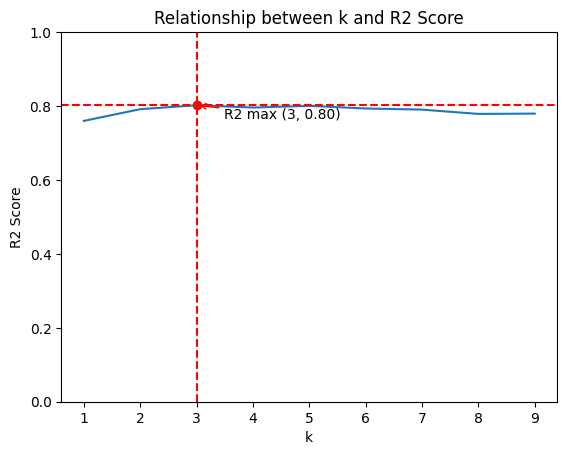

In [816]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)
# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tìm kiếm giá trị tối ưu cho siêu tham số k
best_score = -float('inf')
best_k = None
# Lưu các giá trị k và R2 vào các danh sách
k_values = []
r2_scores = []

for k in range(1, 10):
    knn_model = KNeighborsRegressor(n_neighbors=k)
    # cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
    # mean_score = cv_scores.mean()
    y_test_pred = knn_model.fit(X_train_transformed, y_train).predict(X_test_transformed)
    test_r2 = r2_score(y_test, y_test_pred)

    k_values.append(k)
    r2_scores.append(test_r2)

    print("k:", k, "   R2:", test_r2)
    
    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

print("Best k:", best_k)
print("Best R2 score:", best_score)

# Vẽ đồ thị
plt.plot(k_values, r2_scores)
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Relationship between k and R2 Score')
plt.ylim(0, 1)  # Chia giá trị R2 từ 0 đến 1 trên trục y
# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
for i in range(len(k_values)):
    k = k_values[i]
    test_r2 = r2_scores[i]

    if test_r2 > best_score:
        best_score = test_r2
        best_k = k

# Đánh dấu điểm R2 tối đa
plt.scatter(best_k, best_score, color='red')
plt.annotate(f'R2 max ({best_k}, {best_score:.2f})', (best_k, best_score), xytext=(20, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->", color='red'))
# Vẽ đường gióng xuống các trục đồ thị cho điểm tối đa
plt.axvline(x=best_k, color='red', linestyle='--')
plt.axhline(y=best_score, color='red', linestyle='--')


plt.show()

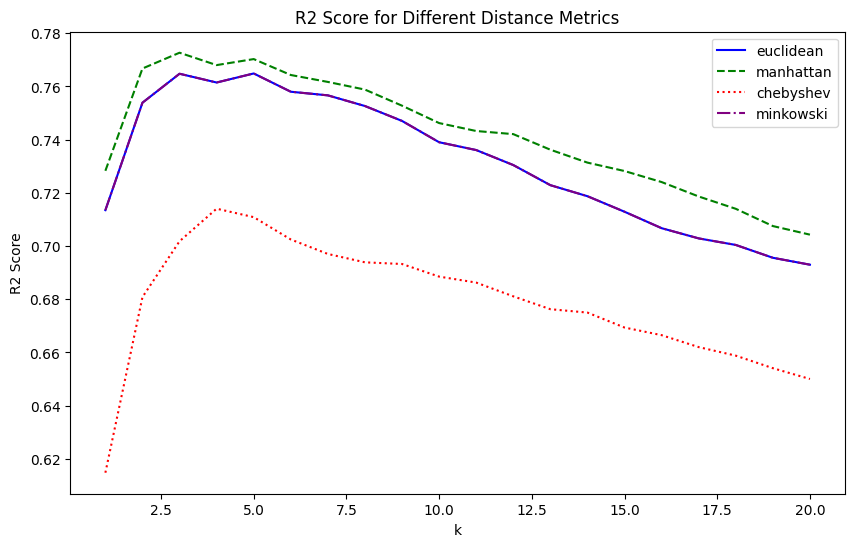

In [817]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_train_transformed = column_transformer.fit_transform(X_train)

# Các hàm đo khoảng cách cần được so sánh
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Các giá trị k
k_values = range(1, 21)

# Tạo một danh sách để lưu kết quả R2 scores
r2_scores = {}

# Các kiểu đường và màu sắc tương ứng
line_styles = ['-', '--', ':', '-.']
colors = ['blue', 'green', 'red', 'purple']

# Vẽ đồ thị
plt.figure(figsize=(10, 6))
for i, metric in enumerate(distance_metrics):
    knn_model = KNeighborsRegressor(metric=metric)
    scores = []
    for k in k_values:
        knn_model.set_params(n_neighbors=k)
        cv_scores = cross_val_score(knn_model, X_train_transformed, y_train, cv=5, scoring='r2')
        scores.append(cv_scores.mean())
    r2_scores[metric] = scores
    plt.plot(k_values, r2_scores[metric], label=metric, linestyle=line_styles[i], color=colors[i])

plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('R2 Score for Different Distance Metrics')
plt.legend()
plt.show()

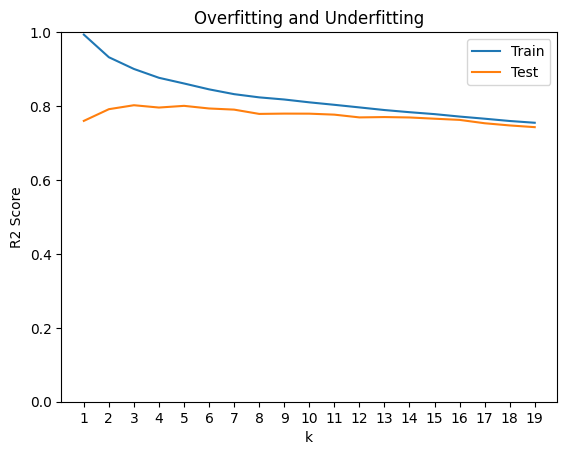

In [818]:
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

for k in k_values:
    # Tạo mô hình kNN với giá trị k hiện tại
    knn_model = KNeighborsRegressor(n_neighbors=k)
    
    # Huấn luyện mô hình trên tập huấn luyện
    knn_model.fit(X_train_transformed, y_train)
    
    # Dự đoán trên tập huấn luyện và tập kiểm tra
    y_train_pred = knn_model.predict(X_train_transformed)
    y_test_pred = knn_model.predict(X_test_transformed)
    
    # Tính R2 score trên tập huấn luyện và tập kiểm tra
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)
    
    # Lưu R2 scores vào danh sách
    train_scores.append(train_score)
    test_scores.append(test_score)

# Vẽ đồ thị R2 scores
plt.plot(k_values, train_scores, label='Train')
plt.plot(k_values, test_scores, label='Test')
plt.xlabel('k')
plt.ylabel('R2 Score')
plt.title('Overfitting and Underfitting')
plt.legend()

# Chia nhỏ trục x với cỡ chia 1 đơn vị
plt.xticks(np.arange(min(k_values), max(k_values)+1, 1))
plt.ylim(0, 1)
plt.show()


In [819]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')



pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

R2 score 0.8202712616476668


In [820]:
from sklearn.model_selection import cross_val_score
# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu X
X_transformed = column_transformer.fit_transform(X)

# Tạo mô hình kNN với số hàng xóm là 3
knn_model = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')

# Áp dụng cross-validation và tính R2 score trên 5 fold
cv_scores = cross_val_score(knn_model, X_transformed, y, cv=5, scoring='r2')

# In ra các kết quả cross-validation
print("Cross-validation scores (R2 for each fold):", cv_scores)
print("Mean R2 score:", cv_scores.mean())

Cross-validation scores (R2 for each fold): [0.69157172 0.81069699 0.82981922 0.60617496 0.78515854]
Mean R2 score: 0.7446842857799209


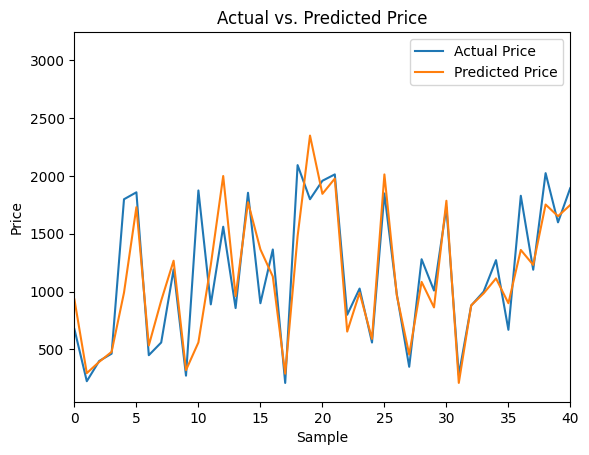

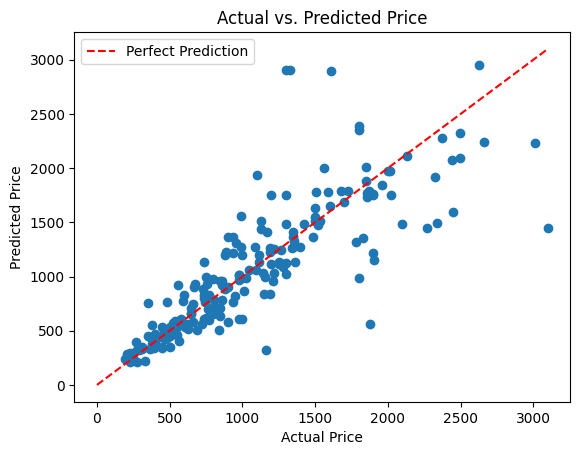

In [821]:

# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)


# Danh sách các giá trị k
k_values = range(1, 20)

# Danh sách R2 scores trên tập huấn luyện và tập kiểm tra
train_scores = []
test_scores = []

# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=3)
    
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train_transformed, y_train)
    
# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
    
# Tính R2 score trên tập huấn luyện và tập kiểm tra
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)
    
# Lưu R2 scores vào danh sách
train_scores.append(train_score)
test_scores.append(test_score)

# # Vẽ đồ thị R2 scores
# plt.plot(k_values, train_scores, label='Train')
# plt.plot(k_values, test_scores, label='Test')
# plt.xlabel('k')
# plt.ylabel('R2 Score')
# plt.title('Overfitting and Underfitting')
# plt.legend()


# Chuẩn bị dữ liệu
x_values = range(len(y_test))
y_true = np.exp(y_test)  # Chuyển đổi giá trị log về giá chính xác
y_pred = np.exp(y_test_pred)  # Chuyển đổi giá trị log về giá dự đoán

# Vẽ đồ thị
plt.plot(x_values, y_true, label='Actual Price')
plt.plot(x_values, y_pred, label='Predicted Price')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price')
plt.legend()

# Đặt giới hạn cho trục x
plt.xlim(0, 40)


plt.show()

# Vẽ đồ thị scatter
plt.scatter(y_true, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')

# Vẽ đường thẳng y = x để so sánh
max_value = max(np.max(y_true), np.max(y_pred))
plt.plot([0, max_value], [0, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.legend()
plt.show()



In [822]:
import time

# Xác định các cột cần chuyển đổi
columns_to_encode = [0, 1, 7, 10, 11]

# Tạo một ColumnTransformer để chuyển đổi các cột được chỉ định
column_transformer = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first'), columns_to_encode)
    ],
    remainder='passthrough'
)

# Áp dụng chuyển đổi trên dữ liệu huấn luyện
X_train_transformed = column_transformer.fit_transform(X_train)

# Áp dụng chuyển đổi trên dữ liệu kiểm tra
X_test_transformed = column_transformer.transform(X_test)
# Tạo mô hình kNN với giá trị k hiện tại
knn_model = KNeighborsRegressor(n_neighbors=3, metric = 'manhattan')
    
start_training_time = time.time()
knn_model.fit(X_train_transformed, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

start_prediction_time = time.time()
y_train_pred = knn_model.predict(X_train_transformed)
y_test_pred = knn_model.predict(X_test_transformed)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

start_time = time.time()
y_pred = knn_model.predict(X_test_transformed)
end_time = time.time()
total_runtime = end_time - start_time

print("Training time:", training_time, "seconds")
print("Prediction time:", prediction_time, "seconds")
print("Total runtime:", total_runtime, "seconds")

Training time: 0.0 seconds
Prediction time: 0.045392751693725586 seconds
Total runtime: 0.007976293563842773 seconds


### Random Forest Regressor 

In [823]:
#RandomForestClassifierđược sử dụng cho các nhiệm vụ phân loại, trong đó mục tiêu là dự đoán nhãn hoặc lớp phân loại. Nó thường được sử dụng cho các tác vụ như phát hiện thư rác, phân tích tình cảm hoặc phân loại hình ảnh.
#RandomForestRegressorđược sử dụng cho các tác vụ hồi quy, trong đó mục tiêu là dự đoán một giá trị số liên tục. Nó thường được sử dụng cho các nhiệm vụ như dự đoán giá nhà đất, giá cổ phiếu hoặc dự báo doanh số bán hàng.

In [824]:
# Overfitting Là hiện tượng mô hình ghi nhớ quá tốt dữ liệu huấn luyện và phụ thuộc vào nó, việc này khiến cho mô hình không thể tổng quát hóa các quy luật để hoạt động với dữ liệu chưa từng được chứng kiến.

In [825]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('Test R2 score:', r2_score(y_test, y_pred)) # R2 để đánh giá khả năng dự đoán của mô hình trên dữ liệu chưa được huấn luyện.
print('MAE:', mean_absolute_error(y_test, y_pred)) #MAE đo độ lớn trung bình của sai số tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.


Test R2 score: 0.8864178616928321
MAE: 0.15925250532446364


In [826]:
#cross validation

In [827]:
from sklearn.model_selection import cross_val_score

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
# Thực hiện cross-validation với k-fold
k = 5
scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring='r2')

# In kết quả đánh giá từng fold
for fold_idx, score in enumerate(scores):
    print(f"Fold {fold_idx+1}: R^2 = {score}")
cv_mae = -cross_val_score(pipe, X, y, cv=5, scoring='neg_mean_absolute_error').mean()

# Tính trung bình và độ lệch chuẩn của kết quả
mean_score = scores.mean()
std_score = scores.std()
print("Mean R^2:", mean_score)
print("Standard Deviation:", std_score)
print("Cross-Validation MAE:", cv_mae)


Fold 1: R^2 = 0.8422936807016375
Fold 2: R^2 = 0.8757415002241056
Fold 3: R^2 = 0.8649474885754583
Fold 4: R^2 = 0.8872701767715195
Fold 5: R^2 = 0.8761863503168493


c:\Users\tranq\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


Mean R^2: 0.8692878393179141
Standard Deviation: 0.015232379310916033
Cross-Validation MAE: 0.1766964768333274


In [828]:
#holdout validation

In [829]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Chia dữ liệu thành tập huấn luyện và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=3)

# Định nghĩa các bước xử lý và mô hình
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Huấn luyện mô hình trên tập huấn luyện
pipe.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred = pipe.predict(X_val)

# Đánh giá hiệu suất trên tập validation
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# In kết quả
print("Mean Absolute Error on Validation Set:", mae)
print("R2 Score on Validation Set:", r2)


Mean Absolute Error on Validation Set: 0.17164244082763194
R2 Score on Validation Set: 0.8675758676787872


In [830]:
# Out-of-bag (OOB) là một phương pháp đánh giá hiệu suất mô hình trong quá trình huấn luyện cây quyết định trong thuật toán Random Forest. Trong Random Forest, mỗi cây quyết định được huấn luyện trên một mẫu dữ liệu con được chọn ngẫu nhiên từ tập huấn luyện. Một số mẫu dữ liệu không được chọn trong quá trình huấn luyện của cây đó được gọi là "out-of-bag" samples.

# Ý tưởng của OOB là sử dụng các mẫu dữ liệu OOB để đánh giá hiệu suất mô hình mà không cần sử dụng tập dữ liệu kiểm tra riêng biệt. Mỗi mẫu dữ liệu OOB chỉ được dùng để đánh giá bởi những cây quyết định không sử dụng nó trong quá trình huấn luyện.

# Sau khi huấn luyện Random Forest, OOB evaluation tính toán các dự đoán trên các mẫu dữ liệu OOB bằng cách sử dụng chỉ các cây quyết định không sử dụng mẫu đó trong quá trình huấn luyện. Kết quả của OOB evaluation được sử dụng để đánh giá hiệu suất của mô hình, ví dụ như tính R2 score, mean absolute error (MAE), v.v.

# OOB evaluation cung cấp một phương pháp đơn giản và tiện lợi để đánh giá hiệu suất mô hình Random Forest mà không cần phải chia tập dữ liệu thành tập huấn luyện và tập kiểm tra riêng biệt.

In [831]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')

step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    oob_score=True  # Sử dụng OOB evaluation
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

oob_r2 = pipe['step2'].oob_score_
oob_mae = mean_absolute_error(y_train, pipe['step2'].oob_prediction_)

print('OOB R2 score:', oob_r2)
print('OOB MAE:', oob_mae)


OOB R2 score: 0.8761394217864726
OOB MAE: 0.16817771571400794


In [832]:
target_correlations = df.corr()['Price_euros'].apply(abs).sort_values().to_frame()

In [833]:
target_correlations

,Price_euros
HDD,0.096891
Touchscreen,0.192917
Weight,0.209867
Ips,0.253320
ppi,0.475368
SSD,0.670660
Ram,0.742905
Price_euros,1.000000


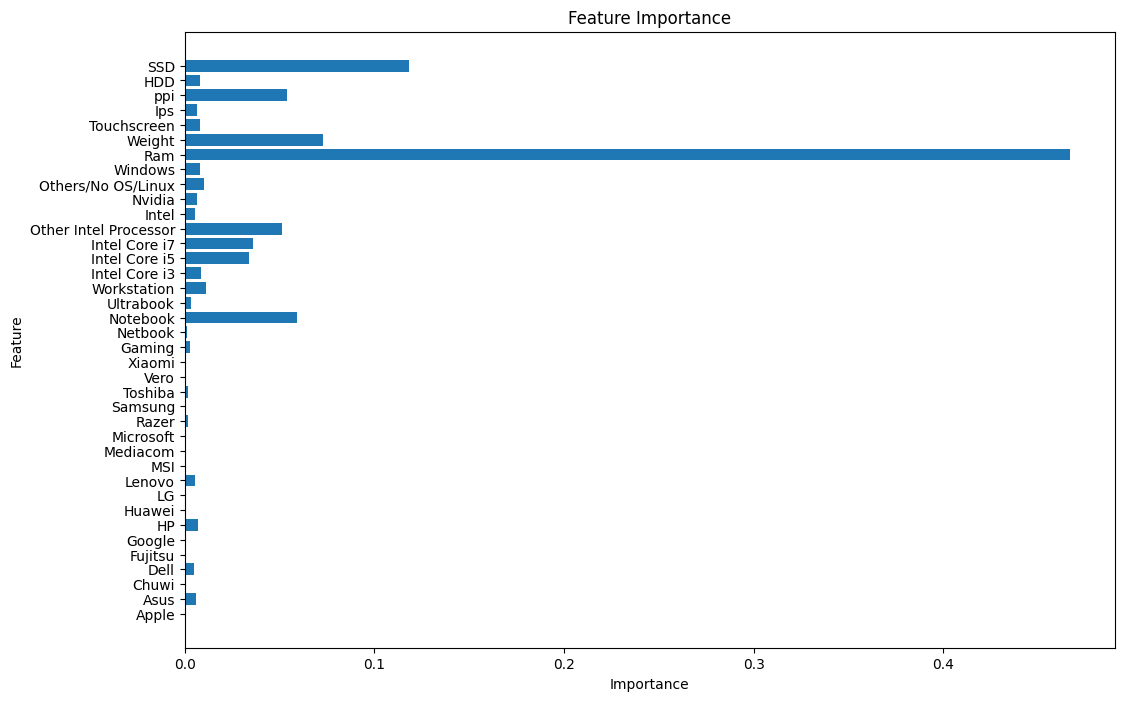

In [834]:
import matplotlib.pyplot as plt

# Lấy mức độ quan trọng của các biến từ mô hình
feature_importances = pipe.named_steps['step2'].feature_importances_

# Lấy tên toàn bộ các biến từ ColumnTransformer
feature_names = pipe.named_steps['step1'].get_feature_names_out()

# Rút gọn tên các biến
shortened_names = [name.rsplit('_', 1)[-1] for name in feature_names]

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
plt.barh(range(len(feature_importances)), feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Đặt nhãn cho trục y với tên các biến đã rút gọn
plt.yticks(range(len(shortened_names)), shortened_names)

plt.show()


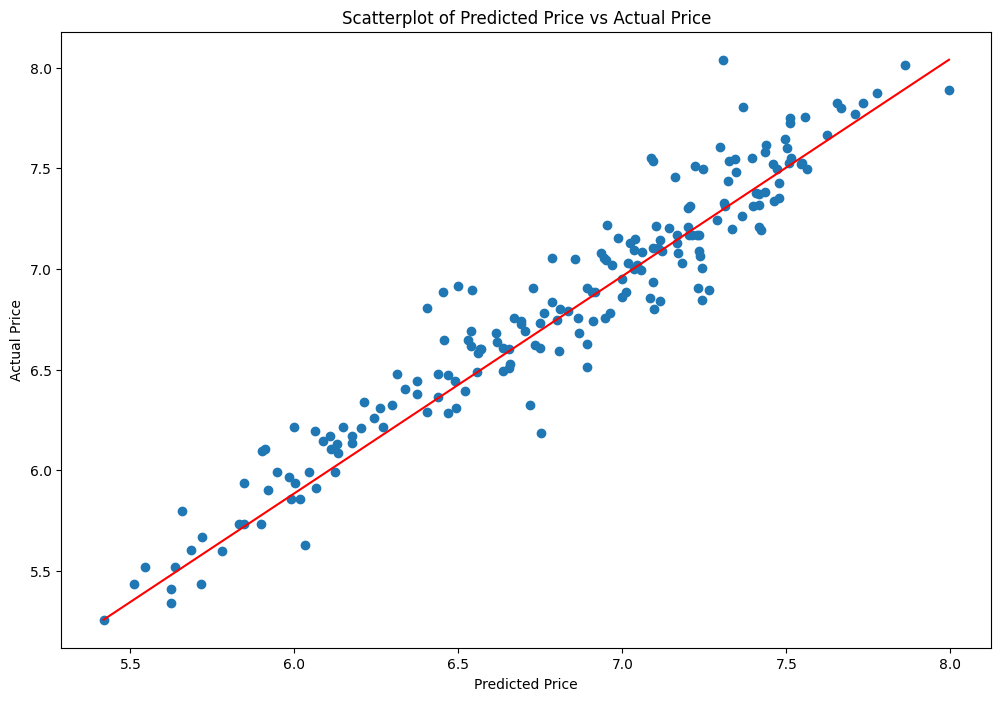

In [835]:
import matplotlib.pyplot as plt
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


plt.figure(figsize=(12, 8))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Scatterplot of Predicted Price vs Actual Price')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red')
plt.show()

In [836]:
#Đánh giá mức độ quan trọng của các biến

In [837]:
#thay đổi n_estimators
# Khi giá trị của n_estimators càng lớn, mô hình sẽ có nhiều cây quyết định hơn, và sự phức tạp của mô hình cũng tăng lên. Tuy nhiên, việc tăng số lượng cây quyết định cũng có thể làm tăng thời gian huấn luyện của mô hình.

#Thông thường, một giá trị n_estimators đủ lớn sẽ cung cấp hiệu suất tốt cho mô hình Random Forest,

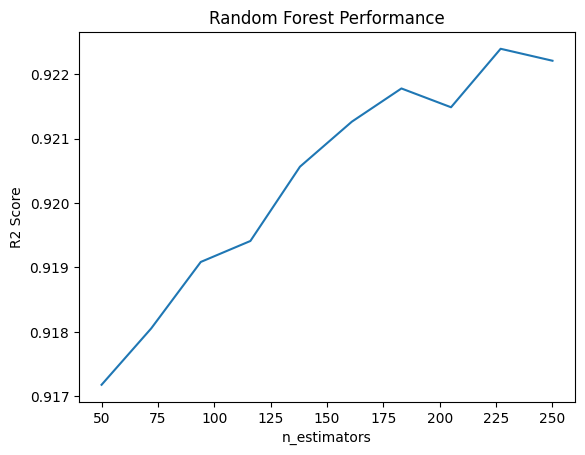

Max R2 Score: 0.9223949266623295
Best n_estimators: 227


In [838]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị n_estimators liên tục
n_estimators_values = np.linspace(50, 250, 10).astype(int)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for n_estimators in n_estimators_values:
    step2 = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và chỉ mục tương ứng
max_r2 = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_n_estimators = n_estimators_values[max_r2_index]

# Vẽ đồ thị biểu diễn R2 Score theo giá trị n_estimators
plt.plot(n_estimators_values, r2_scores)
plt.xlabel('n_estimators')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

print('Max R2 Score:', max_r2)
print('Best n_estimators:', best_n_estimators)


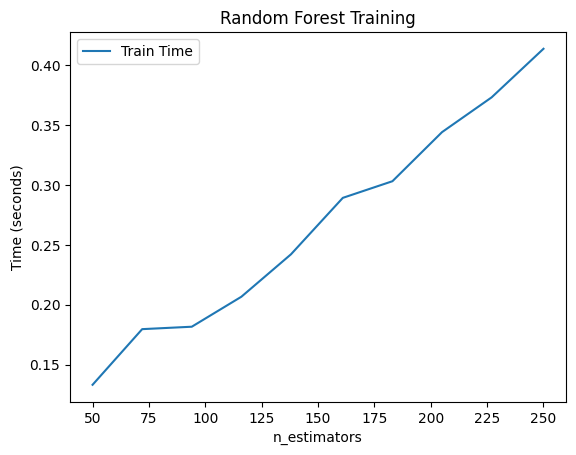

In [839]:
import time
import matplotlib.pyplot as plt

# Khoảng giá trị n_estimators liên tục
n_estimators_values = np.linspace(50, 250, 10).astype(int)
train_times = []
test_times = []

for n_estimators in n_estimators_values:
    step2 = RandomForestRegressor(
        n_estimators=n_estimators,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    # Đo thời gian chạy train
    start_time = time.time()
    pipe.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Đo thời gian chạy test
    start_time = time.time()
    y_pred = pipe.predict(X_test)
    test_time = time.time() - start_time

    train_times.append(train_time)
    test_times.append(test_time)

# Vẽ đồ thị biểu diễn thời gian chạy train và test theo giá trị n_estimators
plt.plot(n_estimators_values, train_times, label='Train Time')
#plt.plot(n_estimators_values, test_times, label='Test Time')
plt.xlabel('n_estimators')
plt.ylabel('Time (seconds)')
plt.title('Random Forest Training')
plt.legend()
plt.show()


In [840]:
#max_samples xác định số lượng mẫu (samples) tối đa được sử dụng để huấn luyện mỗi cây trong rừng ngẫu nhiên
#Tham số max_samples có thể giúp kiểm soát sự đa dạng của các cây trong rừng ngẫu nhiên và ngăn chặn việc overfitting. Bằng cách giới hạn số lượng mẫu được sử dụng cho mỗi cây, nó giúp mô hình học từ các tập dữ liệu con và có khả năng tổng quát hóa tốt hơn trên dữ liệu mới.

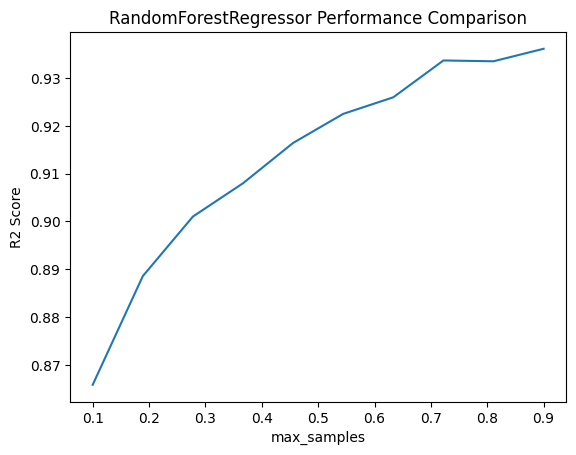

Highest R2 Score: 0.93610229406385
Corresponding max_samples value: 0.9


In [841]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị max_samples liên tục
max_samples_values = np.linspace(0.1, 0.9, 10)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_samples in max_samples_values:
    step1 = ColumnTransformer(transformers=[
        ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
    ], remainder='passthrough')
    
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=max_samples,
        max_features=0.75,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
max_samples = max_samples_values[max_r2_index]


# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_samples
plt.plot(max_samples_values, r2_scores)
plt.xlabel('max_samples')
plt.ylabel('R2 Score')
plt.title('RandomForestRegressor Performance Comparison')
plt.show()
# In ra giá trị R2 Score cao nhất và vị trí tương ứng
print("Highest R2 Score:", max_r2_score)
print("Corresponding max_samples value:", max_samples)


In [842]:
#max_features là một siêu tham số (hyperparameter) quy định số lượng features (đặc trưng) được sử dụng để xây dựng các cây quyết định trong mỗi lần phân chia.
#Lựa chọn max_features có thể ảnh hưởng đến hiệu suất và tính tổng quát của mô hình Random Forest. Qua việc giới hạn số lượng đặc trưng sử dụng trong quá trình phân chia, nó có thể giúp tránh overfitting và cải thiện khả năng tổng quát hóa của mô hình. Tuy nhiên, lựa chọn thích hợp cho max_features thường cần được điều chỉnh thông qua việc thử nghiệm và đánh giá mô hình trên tập dữ liệu kiểm tra.

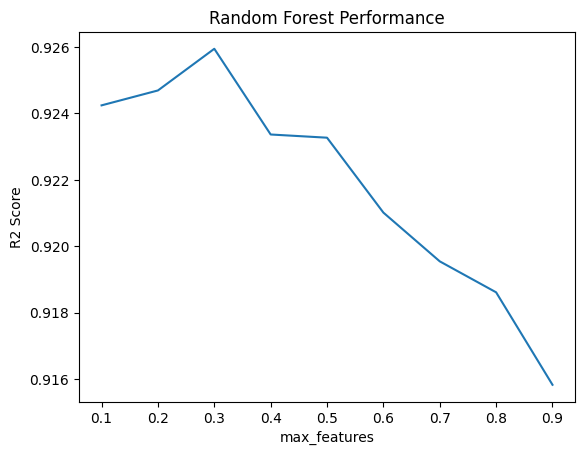

Highest R2 Score: 0.9259442252697329
Best max_features: 0.30000000000000004


In [843]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Danh sách các giá trị max_features để thử
max_features_values = np.arange(0.1, 1, 0.1)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_features in max_features_values:
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=0.5,
        max_features=max_features,
        max_depth=15
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)  # Đánh giá R2 Score trên tập kiểm tra
    r2_scores.append(r2)

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_max_features = max_features_values[max_r2_index]


# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_features
plt.plot(max_features_values, r2_scores)
plt.xlabel('max_features')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

print("Highest R2 Score:", max_r2_score)
print("Best max_features:", best_max_features)


In [844]:
#max_depth xác định độ sâu tối đa của cây quyết định trong mô hình Random Forest. max_depth quyết định số lượng tầng của cây và sự phân chia của các node trong cây.
#Giá trị max_depth ảnh hưởng đến hiệu suất của mô hình. Một giá trị max_depth quá lớn có thể dẫn đến overfitting (quá khớp), trong đó mô hình học "quá nhớ" các mẫu huấn luyện cụ thể nhưng không tổng quát hóa tốt cho dữ liệu mới. Ngược lại, một giá trị max_depth quá nhỏ có thể dẫn đến underfitting (thiếu khớp), trong đó mô hình không học đủ thông tin từ dữ liệu huấn luyện.

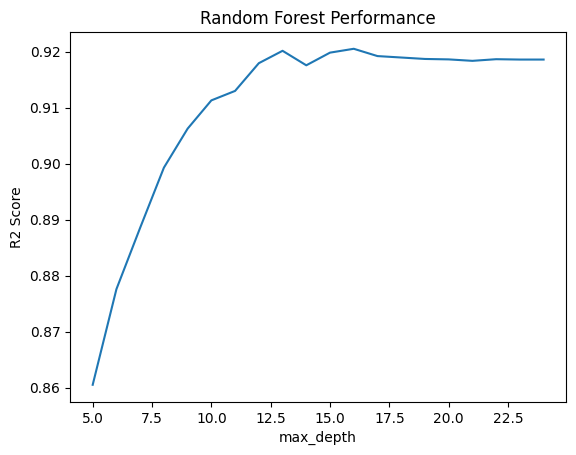

Highest R2 Score: 0.9204925353056272
Best max_depth: 16


In [845]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Khoảng giá trị liên tục để thử
max_depth_values = np.arange(5, 25, 1)

# Danh sách để lưu trữ các giá trị R2 Score tương ứng
r2_scores = []

for max_depth in max_depth_values:
    step2 = RandomForestRegressor(
        n_estimators=100,
        random_state=3,
        max_samples=0.5,
        max_features=0.75,
        max_depth=max_depth
    )

    pipe = Pipeline([
        ('step1', step1),
        ('step2', step2)
    ])

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    r2 = r2_score(y_test, y_pred)  # Đánh giá R2 Score trên tập kiểm tra
    r2_scores.append(r2)

# Vẽ đồ thị biểu diễn R2 Score theo giá trị max_depth
plt.plot(max_depth_values, r2_scores)
plt.xlabel('max_depth')
plt.ylabel('R2 Score')
plt.title('Random Forest Performance')
plt.show()

# Tìm giá trị R2 Score cao nhất và vị trí tương ứng
max_r2_score = np.max(r2_scores)
max_r2_index = np.argmax(r2_scores)
best_max_depth = max_depth_values[max_r2_index]

print("Highest R2 Score:", max_r2_score)
print("Best max_depth:", best_max_depth)

In [846]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11])
], remainder='passthrough')
step2 = RandomForestRegressor(
    n_estimators=227,
    random_state=3,
    max_samples=0.9,
    max_features=0.3,
    max_depth=16
)

pipe1 = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe1.fit(X_train, y_train)

y_pred = pipe1.predict(X_test)

print('Test R2 score:', r2_score(y_test, y_pred)) # R2 để đánh giá khả năng dự đoán của mô hình trên dữ liệu chưa được huấn luyện.
print('MAE:', mean_absolute_error(y_test, y_pred)) #MAE đo độ lớn trung bình của sai số tuyệt đối giữa các giá trị dự đoán và giá trị thực tế.


Test R2 score: 0.9416772676988583
MAE: 0.1021796706722813


In [847]:
import time

# Bắt đầu đếm thời gian train
start_train_time = time.time()

# Train mô hình
pipe1.fit(X_train, y_train)

# Kết thúc đếm thời gian train và tính thời gian train
end_train_time = time.time()
train_time = end_train_time - start_train_time

# Bắt đầu đếm thời gian test
start_test_time = time.time()

# Dự đoán trên dữ liệu test
y_pred = pipe1.predict(X_test)

# Kết thúc đếm thời gian test và tính thời gian test
end_test_time = time.time()
test_time = end_test_time - start_test_time

# Tính tổng thời gian (train + test)
total_time = train_time + test_time

# In kết quả
print('Training time:', train_time, 'seconds')
print('Prediction time:', test_time, 'seconds')
print('Total time:', total_time, 'seconds')


Training time: 0.38324809074401855 seconds
Prediction time: 0.021971702575683594 seconds
Total time: 0.40521979331970215 seconds


### Exporting the Model

In [848]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
pickle.dump(pipe1,open('pipe1.pkl','wb'))

In [849]:
df

,Company,TypeName,Ram,Weight,Price_euros,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,638.00,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1499.00,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,229.00,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,764.00,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [850]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
189,Dell,Notebook,8,2.800,0,0,127.335675,Intel Core i7,1000,128,AMD,Windows
108,MSI,Gaming,16,2.200,0,0,141.211998,Intel Core i7,1000,256,Nvidia,Windows
464,Lenovo,Notebook,8,2.670,0,0,141.211998,Intel Core i7,0,256,Nvidia,Windows
1213,Dell,2 in 1 Convertible,8,2.191,1,1,141.211998,Intel Core i5,0,256,Intel,Windows
447,Dell,Workstation,8,2.230,0,0,141.211998,Other Intel Processor,1000,0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
789,Dell,Gaming,8,2.620,0,0,141.211998,Intel Core i5,0,256,Nvidia,Windows
256,HP,Notebook,8,1.910,0,0,100.454670,AMD Processor,0,128,AMD,Windows
968,Dell,Gaming,32,4.420,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
952,Toshiba,Notebook,8,1.200,0,0,165.632118,Intel Core i5,0,256,Intel,Windows


In [851]:
df.dtypes


Company         object
TypeName        object
Ram              int32
Weight         float32
Price_euros    float64
Touchscreen      int64
Ips              int64
ppi            float64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object